# Proyek Analisis Data: Bike Sharing
- Nama: Rachmat Darmawan
- Email: darrachmat@gmail.com
- Id Dicoding: 2129983

## Menentukan Pertanyaan Bisnis

- pertanyaan 1:  Bagaimana hubungan antara musim dan jumlah sewa sepeda harian ?

- pertanyaan 2: Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

## Menyaipkan semua library yang dibuthkan

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [34]:
#Memuat Data hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/Darmawan13/Data-/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
#Memuat Data day
day_df= pd.read_csv("https://raw.githubusercontent.com/Darmawan13/Data-/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
#menghitung jumlah baris setiap DataFrame
print("Jumlah baris di DataFrame day:", day_df.shape[0])
print("Jumlah baris di DataFrame hour:", hour_df.shape[0])

Jumlah baris di DataFrame day: 731
Jumlah baris di DataFrame hour: 17379


In [39]:
bike_sharing_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing_df.shape)
# df_product.head()
bike_sharing_df.loc[bike_sharing_df["dteday"].isnull()]
bike_sharing_df.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


menggabungkan data dalam beberapa dataframe

### Assessing Data

In [40]:
#memeriksa data hour
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
#Memeriksa data day
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
#Memeriksa bike sharing
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

Menilai Data bike sharing

In [43]:
print(bike_sharing_df.shape)
bike_sharing_df.isnull().sum()

(17379, 32)


instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Tidak terdapat data missing value pada setiap kolom bike_sharing

In [44]:
print("Jumlah duplikasi: ", bike_sharing_df.duplicated().sum())
bike_sharing_df.describe()

Jumlah duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat duplikasi

### Cleaning Data

In [ ]:
#Tidak ditemukan missing value dan duplikasi data

## Exploratory Data Analysis (EDA)

In [45]:
# mendefinisikan fungsi yang akan digunakan untuk EDA
def range(series):
    return series.max() - series.min()

In [46]:
bike_sharing_df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore ...

In [47]:
bike_sharing_df.groupby(by="season_hourly").agg({
    "workingday_hourly": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

In [48]:
bike_sharing_df.groupby(by="season_daily").agg({
    "workingday_daily": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_daily": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_daily", "count"), ascending=False)

workingday_daily windspeed_daily                               
                        count             max       min      mean <lambda_0>
season_daily                                                                
3                        4496        0.375617  0.064071  0.171593   0.311546
2                        4409        0.388067  0.065929  0.203410   0.322138
1                        4242        0.507463  0.045408  0.215107   0.462055
4                        4232        0.422275  0.022392  0.170819   0.399883

In [49]:
bike_sharing_df.groupby(by="season_daily").mnth_daily .nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

In [51]:
bike_sharing_df.groupby(by="season_daily").instant_daily.nunique()

season_daily
1    181
2    184
3    188
4    178
Name: instant_daily, dtype: int64

In [50]:
bike_sharing_df.groupby(by="season_daily").cnt_daily.nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

In [54]:
bike_sharing_df.groupby(by="season_daily").cnt_hourly.nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [53]:
bike_sharing_df.groupby(by="season_daily").cnt_hourly.nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [52]:
bike_sharing_df.groupby(by="weathersit_daily").cnt_daily.nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

KORELASI

mecari nilai korelasi dari setiap data perhari.

In [55]:
numerical_columns = ["holiday_daily"
 ,"weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily", "windspeed_daily",  "cnt_daily"]
correlation = bike_sharing_df[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

## Visualization & Explanatory Analysis

### Pertanyaan 1:

 Bagaimana hubungan antara musim dan jumlah sewa sepeda harian ?

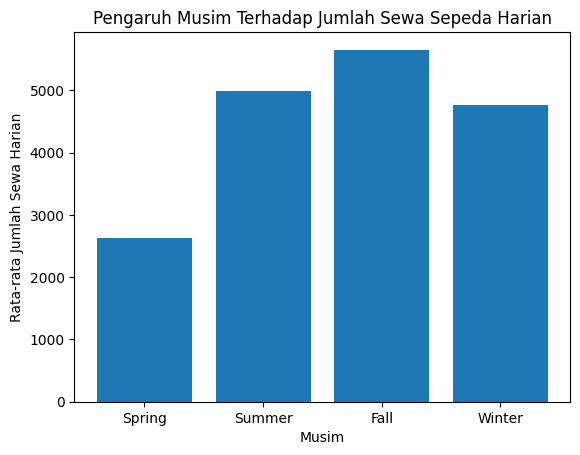

In [56]:
seasonal_data = bike_sharing_df.groupby('season_daily')['cnt_daily'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, seasonal_data)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

grafik diatas dapat di lihat bahwa, jumlah sewa sepeda lebih banyak pada musim gugur(Fall)

### Pertanyaan 2:

Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

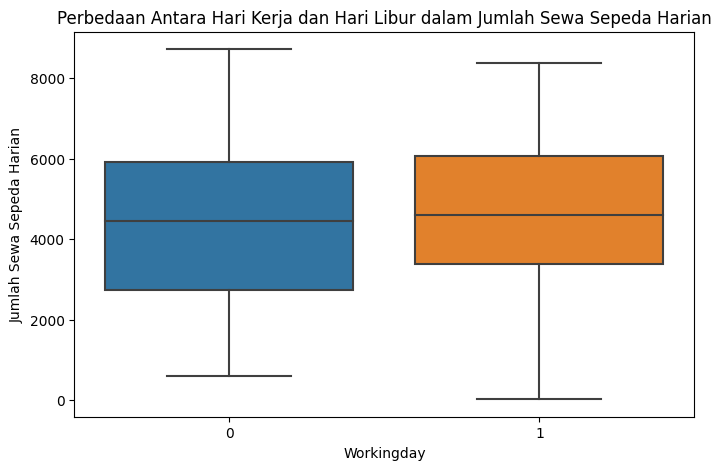

In [57]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_sharing_df)
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

dari gerafik berikut dapat dilihat jumlah sewa sepeda lebih banyak ketika hari kerja daipada hari libur.

## Conclusion

- Conclution pertanyaan 1: jumlah sewa sepeda mengingkat ketika cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian.
- conclution pertanyaan 2: jumlah sewa sepeda lebih banyak ketika hari kerja daipada hari libur.

In [59]:
print(type(all_df))


<class 'function'>


In [61]:
import pandas as pd

# Contoh memuat data ke dalam DataFrame
all_df = pd.read_csv("all_data.csv")


In [63]:
import pandas as pd

# Muat atau buat DataFrame
all_df = pd.read_csv("all_data.csv")

# Lakukan analisis atau operasi lainnya...

# Simpan DataFrame ke dalam CSV
all_df.to_csv("all_data.csv", index=False)
